# LAB | A/B Testing in Python

### Challenge 1: 🚀 *Comparing Two Website Versions Using Hypothesis Testing*  

### **Objective**:
Perform an A/B test to determine if a new webpage design (`Version B`) leads to a higher **click-through rate (CTR)** than the original (`Version A`).  

#### 📌 **Project Overview**  
We’ll:  
1. **Simulate** A/B test data (users & clicks).  
2. **Analyze** the results using statistical tests.  
3. **Conclude** whether `Version B` performs better.  



### **Problem Statement**  
You are a data analyst at an e-commerce company. The team wants to test if a new webpage design (`Version B`) increases click-through rates (CTR) compared to the original (`Version A`).  

### **Tasks**  
1. **Simulate Data**:  
   - Generate synthetic data for `Version A` (1000 visitors, 150 clicks) and `Version B` (1050 visitors, 180 clicks).  
2. **Statistical Test**:  
   - Perform a **Statistical Test** to compare CTRs.  
3. **Interpretation**:  
   - Determine if the difference is statistically significant (use α = 0.05).  
4. **Visualization**:  
   - Plot the CTRs for both versions using appropriate chart.  

**Deliverables**:  
- Code for simulation, testing, and visualization.  
- Written conclusion (1–2 sentences) on whether `Version B` performs better.  

#### 🛠 **Setup & Data Generation**  
First, let’s create synthetic data for the experiment.  


In [3]:
### Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

> Simulate User Data, We’ll assume:

- Version A: 1000 visitors, 150 clicks.

- Version B: 1050 visitors, 180 clicks.

In [2]:
# Simulate data
np.random.seed(42)
visitors_a = 1000
clicks_a = 150
visitors_b = 1050
clicks_b = 180

In [5]:
# TODO
ctr_a = 150/1000
ctr_b = 180/1050

# H0: crt_a = ctr_b
# H1: ctr_a != ctr_b

# Clicks
clicks = [150, 180]
# Visitors
n = [1000, 1050]

# two-sided z-Test
stat, p_value = proportions_ztest(count=clicks, nobs=n)

print(f"Z-value: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("👉 H0 can be rejected . There is a significant difference between the click rates (α = 0.05)")
else:
    print("👉 H0 cannot be rejected. No significant difference (α = 0.05)")


Z-value: -1.3196
p-value: 0.1870
👉 H0 cannot be rejected. No significant difference (α = 0.05)


📊 Perform A/B Test
We’ll use a Chi-Square Test to compare proportions.

- Hypotheses

In [6]:
# H0: crt_a = ctr_b
# H1: ctr_a != ctr_b

# Contingency table:
# Rows: Version A and B
# Columns: Clicks and No Clicks
table = [
    [150, 850],  # Version A: 150 clicks, 850 no-clicks
    [180, 870]   # Version B: 180 clicks, 870 no-clicks
]

Chi-squared statistic: 1.5863
p-value: 0.2079
Degrees of freedom: 1
Expected frequencies:
[[160.97560976 839.02439024]
 [169.02439024 880.97560976]]
👉 No statistically significant difference between groups (fail to reject H0)



- Run the Test

In [7]:
# TODO
# Perform the Chi-Square test of independence
chi2, p, dof, expected = stats.chi2_contingency(table)

# Results
print(f"Chi-squared statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi-squared statistic: 1.5863
p-value: 0.2079
Degrees of freedom: 1
Expected frequencies:
[[160.97560976 839.02439024]
 [169.02439024 880.97560976]]


> Interpret Results

In [8]:
# Interpretation
alpha = 0.05
if p < alpha:
    print("👉 Statistically significant difference between groups (reject H0)")
else:
    print("👉 No statistically significant difference between groups (fail to reject H0)")

👉 No statistically significant difference between groups (fail to reject H0)


📈 Visualization

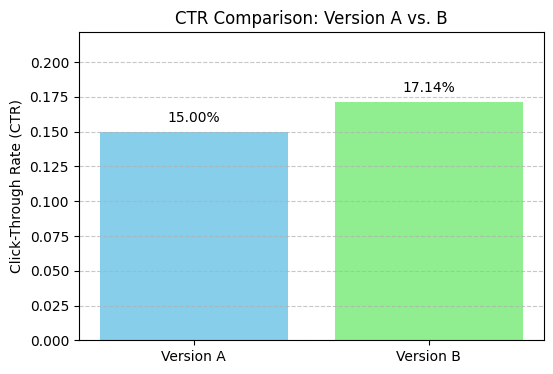

In [10]:
# Data
versions = ['Version A', 'Version B']
clicks = [150, 180]
visitors = [1000, 1050]

# Calculate CTRs
ctrs = [clicks[i] / visitors[i] for i in range(2)]

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(versions, ctrs, color=['skyblue', 'lightgreen'])

# Add percentage labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005,
             f'{height:.2%}', ha='center', va='bottom')

# Formatting
plt.ylabel('Click-Through Rate (CTR)')
plt.title('CTR Comparison: Version A vs. B')
plt.ylim(0, max(ctrs) + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


## Challenge 2: 🚀 A/B Testing Challenge with Real Data

#### **Objective**:  
1. Analyze **real A/B test data** (from Kaggle) to compare conversion rates.  
2. Use **bootstrapping** to estimate confidence intervals.  

---

#### 📌 **Project Overview**  
We’ll:  
1. **Load real A/B test data** (user sessions and conversions).  
2. **Compare conversion rates** using statistical tests.  
3. **Apply bootstrapping** to validate results.  



### **Problem Statement**  
Use the [Kaggle Marketing A/B Test dataset](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) to analyze if a new marketing campaign (`Group B`) improves conversion rates over the old campaign (`Group A`).  

### **Tasks**  
1. **Data Preparation**:  
   - Load the dataset and explore key metrics (sample sizes, conversion rates).  
2. **Hypothesis Testing**:  
   - Perform a **Statistical Test** to compare conversions between groups.  
3. **Bootstrapping**:  
   - Implement bootstrapping (`n=1000` resamples) to estimate 95% confidence intervals for conversion rates.  
4. **Visualization**:  
   -Compare conversion rates for both groups.  

**Deliverables**:  
- Code for analysis and bootstrapping.  
- Answers:  
  - P-value and statistical conclusion.  
  - Confidence intervals for both groups.  

#### 🛠 **Setup & Data Loading**  


In [ ]:
### Import Libraries

> Load Open-Source Dataset
We’ll use the ["A/B Test Results"](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) dataset from Kaggle.

In [11]:
# Load data (ensure CSV is in your working directory)
from google.colab import files

uploaded = files.upload()


Saving marketing_AB.csv to marketing_AB.csv


In [17]:
df = pd.read_csv('marketing_AB.csv')
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


📊 Part 1: Traditional A/B Test
> Calculate Conversion Rates

In [18]:
# TODO
# Insert your code HERE
conversion_rates = df.groupby("test group")["converted"].mean()

print(conversion_rates)

test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


> Statistical Test

In [20]:
conversions_ad = df[df["test group"] == "ad"]["converted"].sum()
n_ad = df[df["test group"] == "ad"].shape[0]

conversions_psa = df[df["test group"] == "psa"]["converted"].sum()
n_psa = df[df["test group"] == "psa"].shape[0]

successes = [conversions_ad, conversions_psa]
samples = [n_ad, n_psa]

z_stat, p_value = proportions_ztest(successes, samples)

print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("👉 Significant difference in conversion rates (reject H0)")
else:
    print("👉 No significant difference in conversion rates (fail to reject H0)")

Z-Statistic: 7.3701
P-Value: 0.0000
👉 Significant difference in conversion rates (reject H0)


#### EXTRA 📈 Part 2: Bootstrapping Challenge
**Why Bootstrapping?**
 - Bootstrapping helps estimate confidence intervals for conversion rates by resampling data.

> Bootstrap Function

KeyboardInterrupt: 

>Visualize Resultsm

In [ ]:
# TODO
# Insert your code HERE

## (Bonus) Challenge 3: 🎮 Advanced A/B Testing Challenge: Cookie Cats Retention Analysis

#### **Objective**:  
1. Analyze player **retention rates** in the `cookie_cats` mobile game A/B test.  
2. Implement **sequential testing** (to avoid peeking at results prematurely).  
3. Conduct **power analysis** to determine optimal sample size.  

### **Problem Statement**  
Analyze the [Cookie Cats dataset](https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing) to determine if moving the game’s first gate from level 30 (`gate_30`) to level 40 (`gate_40`) affects player retention.  

### **Tasks**  
1. **Retention Analysis**:  
   - Compare **1-day retention rates** between `gate_30` and `gate_40` using a Z-test.  
2. **Sequential Testing**:  
   - Simulate checking results at intervals (every 500 users) to avoid "peeking bias."  
3. **Power Analysis**:  
   - Calculate the required sample size to detect a 2% difference in retention (α = 0.05, power = 0.8).  
4. **Optional**:  
   - Repeat analysis for **7-day retention**.  

**Deliverables**:  
- Code for retention comparison, sequential testing, and power analysis.  
- Written summary:  
  - Does `gate_40` significantly impact retention?  
  - How does sequential testing affect decision-making?  



### 🛠 **Setup & Data Loading**  


In [ ]:
# Import Libraries

In [26]:
from google.colab import files

uploaded = files.upload()

Saving cookie_cats.csv to cookie_cats.csv


In [28]:
# Load dataset
data = pd.read_csv("cookie_cats.csv")  # Columns: userid, version, sum_gamerounds, retention_1, retention_7

data

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


📊 Part 1: Retention Rate Analysis
> Compare 1-Day Retention

In [30]:
# TODO
# Insert your code HERE

retention_rates = data.groupby("version")["retention_1"].mean()

print(retention_rates)


version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64


> Statistical Test

In [32]:
retention_gate30 = data[data["version"] == "gate_30"]["retention_1"].sum()
n_gate30= data[data["version"] == "gate_30"].shape[0]

retention_gate40 = data[data["version"] == "gate_30"]["retention_1"].sum()
n_gate40 = data[data["version"] == "gate_40"].shape[0]

successes = [retention_gate30, retention_gate40]
samples = [n_gate30, n_gate40]

z_stat, p_value = proportions_ztest(successes, samples)

print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("👉 Significant difference in retention rates (reject H0)")
else:
    print("👉 No significant difference in retention rates (fail to reject H0)")

Z-Statistic: 2.3491
P-Value: 0.0188
👉 Significant difference in retention rates (reject H0)


📈 Part 2: Sequential Testing
>  Why Sequential Testing?

- Avoids "peeking" at results prematurely by checking at intervals.

In [ ]:
# TODO
# Insert your code HERE

⚡ Part 3: Power Analysis
>  Determine Required Sample Size

In [36]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Beispielwerte:
alpha = 0.05       # Signifikanzniveau
power = 0.8        # Gewünschte Power
baseline_rate = retention_gate30 / n_gate30  # z.B. Conversion Rate gate_30
mde = 0.02         # z.B. 2% Unterschied als MDE

# Berechne die erwartete Retention-Rate für gate_40 = baseline_rate + mde
rate2 = baseline_rate + mde

# Effektgröße berechnen
effect_size = proportion_effectsize(baseline_rate, rate2)

# Power-Analyse initialisieren
analysis = NormalIndPower()

# Benötigte Stichprobengröße pro Gruppe berechnen
sample_size = analysis.solve_power(effect_size=effect_size,
                                   power=power,
                                   alpha=alpha,
                                   alternative='two-sided')

print(f"Benötigte Stichprobengröße pro Gruppe: {int(sample_size)}")


Benötigte Stichprobengröße pro Gruppe: 9741


Enjoy & Happy A/B Testing :) ......!